<a href="https://colab.research.google.com/github/darshitmvora/Tabular-data-to-image-data-for-CNN/blob/main/Tabular_to_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python -m pip -q install git+git://github.com/alok-ai-lab/DeepInsight.git#egg=DeepInsight

In [4]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [5]:
expr_file = r"https://raw.githubusercontent.com/alok-ai-lab/DeepInsight/master/examples/data/tcga.rnaseq_fpkm_uq.example.txt.gz"
expr = pd.read_csv(expr_file, sep="\t")
y = expr['project'].values
X = expr.iloc[:, 1:].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23, stratify=y)
X_train.shape

(480, 5000)

In [6]:
X_train

array([[249536032, 226095333, 205880068, ...,    173934,    461866,
           316977],
       [ 72514874,  55964639,  58491721, ...,    262886,    528618,
           282418],
       [243921629, 242020566, 321192479, ...,    336975,    462868,
           254473],
       ...,
       [127832830,  90581163, 272649391, ...,   1456555,     65753,
           137205],
       [206990504, 137302875, 144541146, ...,    617980,    415242,
           190804],
       [175472942, 307284574, 220074343, ...,    216437,    133692,
           540966]])

In [7]:
ln = LogScaler()
X_train_norm = ln.fit_transform(X_train)
X_test_norm = ln.transform(X_test)

In [8]:
it = ImageTransformer(feature_extractor='tsne', 
                      pixels=50, random_state=1701, 
                      n_jobs=-1)

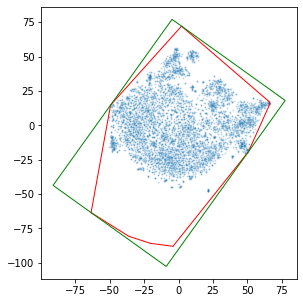

In [9]:
plt.figure(figsize=(5, 5))
it.fit(X_train_norm, plot=True)

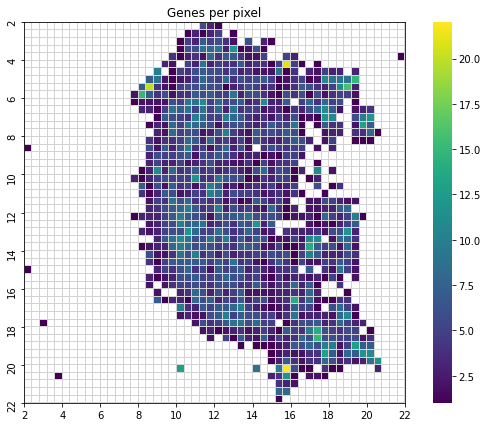

In [10]:
fdm = it.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="viridis", linewidths=0.01, 
                 linecolor="lightgrey", square=True)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
for _, spine in ax.spines.items():
    spine.set_visible(True)
_ = plt.title("Genes per pixel")

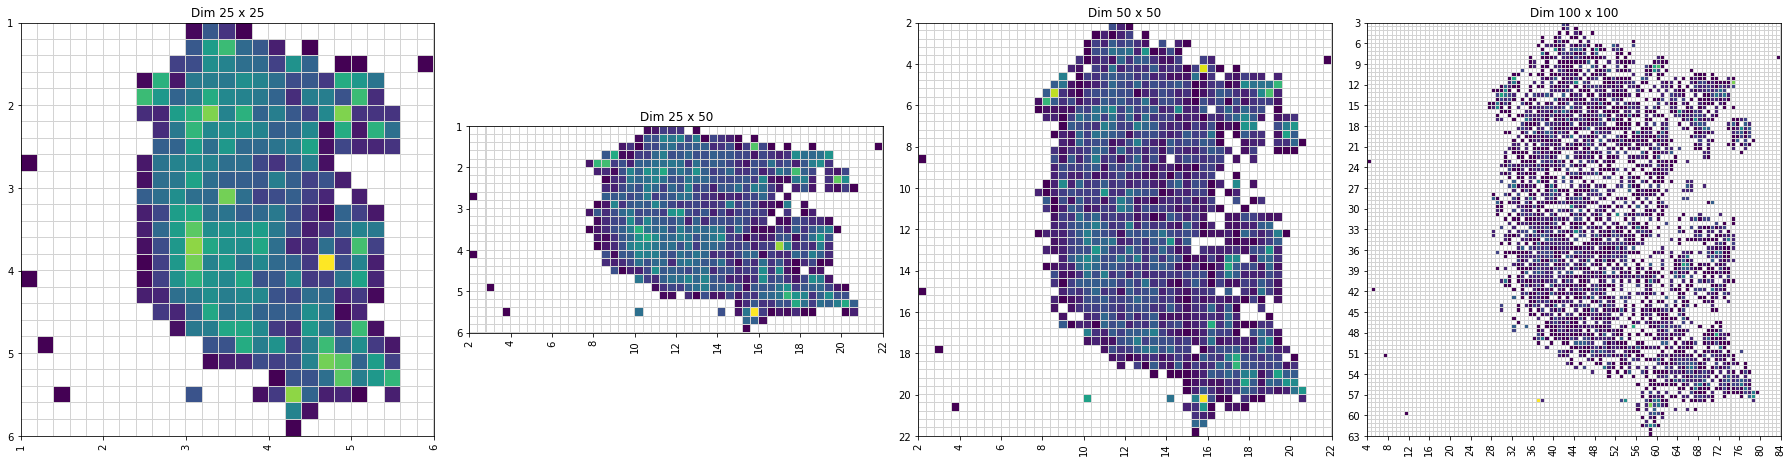

In [11]:
px_sizes = [25, (25, 50), 50, 100]

fig, ax = plt.subplots(1, len(px_sizes), figsize=(25, 7))
for ix, px in enumerate(px_sizes):
    it.pixels = px
    fdm = it.feature_density_matrix()
    fdm[fdm == 0] = np.nan
    cax = sns.heatmap(fdm, cmap="viridis", linewidth=0.01, 
                      linecolor="lightgrey", square=True, 
                      ax=ax[ix], cbar=False)
    cax.set_title('Dim {} x {}'.format(*it.pixels))
    for _, spine in cax.spines.items():
        spine.set_visible(True)
    cax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    cax.yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.tight_layout()    
    
it.pixels = 50

In [12]:
X_train_img = it.transform(X_train_norm)

In [13]:
X_train_img = it.fit_transform(X_train_norm)

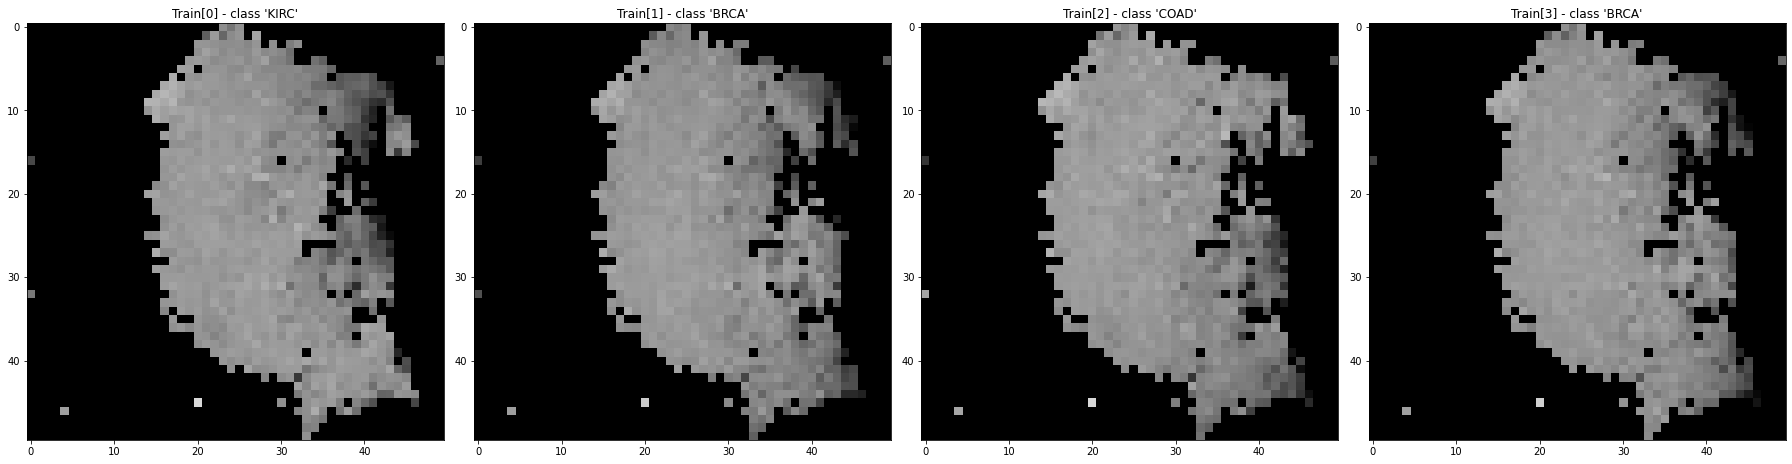

In [14]:
fig, ax = plt.subplots(1, 4, figsize=(25, 7))
for i in range(0,4):
    ax[i].imshow(X_train_img[i])
    ax[i].title.set_text("Train[{}] - class '{}'".format(i, y_train[i]))
plt.tight_layout()

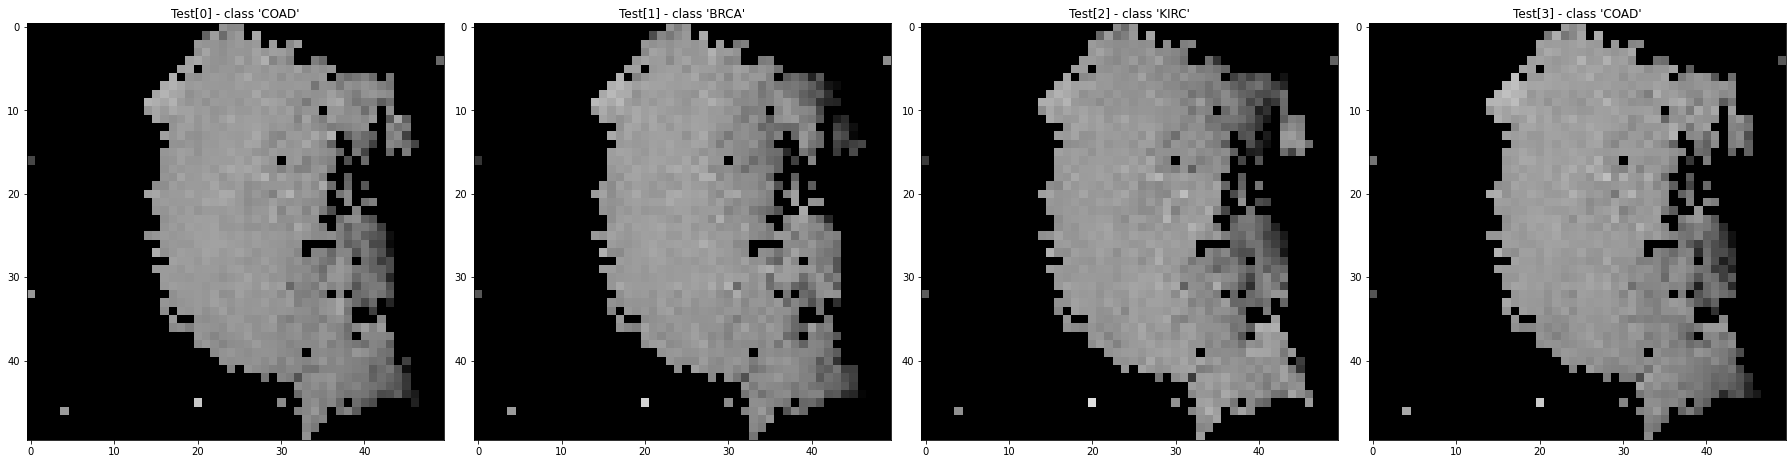

In [15]:
X_test_img = it.transform(X_test_norm)

fig, ax = plt.subplots(1, 4, figsize=(25, 7))
for i in range(0,4):
    ax[i].imshow(X_test_img[i])
    ax[i].title.set_text("Test[{}] - class '{}'".format(i, y_test[i]))
plt.tight_layout()